In [1]:
import pandas as pd
import numpy as np

%precision %.3f # jupyter notebook 소수점 3자리로 제한
pd.set_option('precision', 3) # pandas 소수점 3자리로 제한

In [2]:
# 데이터 불러오기
path = './data/ch2_scores_em.csv'

In [3]:
df = pd.read_csv(path, index_col='student number')

# 1. 관계 지표

## 1-1. 공분산

In [7]:
summary_df = df.copy()

In [8]:
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathmatics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation'] * summary_df['mathmatics_deviation']
summary_df.head()

,english,mathematics,english_deviation,mathmatics_deviation,product of deviations
student number,,,,,
1,42,65,-16.38,-13.88,227.354
2,69,80,10.62,1.12,11.894
3,56,63,-2.38,-15.88,37.794
4,41,63,-17.38,-15.88,275.994
5,57,76,-1.38,-2.88,3.974


In [9]:
summary_df['product of deviations'].mean()

58.485600000000005

### numpy 공분산
$ \left[
\begin{matrix}
V(X) & COV(X, Y) \\
COV(Y, X) & V(Y)
\end{matrix}
\right]$

In [10]:
eng = np.array(df['english'])
math = np.array(df['mathematics'])
cov = np.cov(eng, math, ddof=0)
cov

array([[94.1156, 58.4856],
       [58.4856, 69.3856]])

In [11]:
np.var(eng), np.var(math)

(94.1156, 69.38560000000001)

### pandas 공분산  
`ddof` 인수가 없고 불편분산만 다룬다.

## 1-2. 상관계수
### $ r_{xy} = {{S_{xy}} \over {S_xS_y}}$

In [13]:
cov[0, 1] / (cov[0, 0]*cov[1,1])**0.5

0.7237414863069244

In [14]:
cov[0, 1] / (np.std(eng) * np.std(math))

0.7237414863069241

### numpy 상관행렬

In [15]:
np.corrcoef(eng, math)

array([[1.        , 0.72374149],
       [0.72374149, 1.        ]])

### pandas 상관행렬

In [16]:
df.corr()

,english,mathematics
english,1.000,0.724
mathematics,0.724,1.000


# 2. 시각화

## 2-1. 산점도

In [17]:
import matplotlib.pyplot as plt

%matplotlib inline

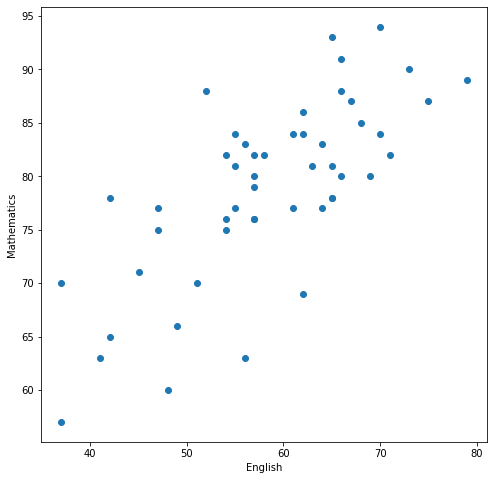

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(eng, math)
ax.set_xlabel('English')
ax.set_ylabel('Mathematics')

plt.show()

## 2-2. 회귀직선
`np.polyfit`, `np.poly1d` 함수를 이용하여 $y=\beta_0+\beta_1x$ 구하기

In [21]:
# 계수 b0, b1 구하기
poly_fit = np.polyfit(eng, math, 1) # x가 eng, y가 math, 차수가 1
# poly_fit의 결과값은 각각 b1, b0

# 구한 게수로 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표 생성
xs = np.linspace(eng.min(), eng.max()) # num=50이 기본값
# xs에 대응하는 y좌표 생성
ys = poly_1d(xs)

xs[:5], ys[:5], poly_fit

(array([37.        , 37.85714286, 38.71428571, 39.57142857, 40.42857143]),
 array([65.59397592, 66.12662422, 66.65927252, 67.19192082, 67.72456912]),
 array([ 0.62142302, 42.60132433]))

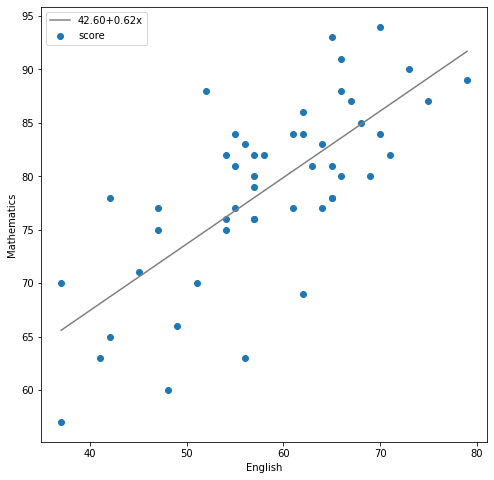

In [22]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(eng, math, label='score')
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('English')
ax.set_ylabel('Mathematics')
# 범례 표시 위치
ax.legend(loc = 'upper left')

plt.show()

## 2-3. 히트맵
2차원 히스토그램

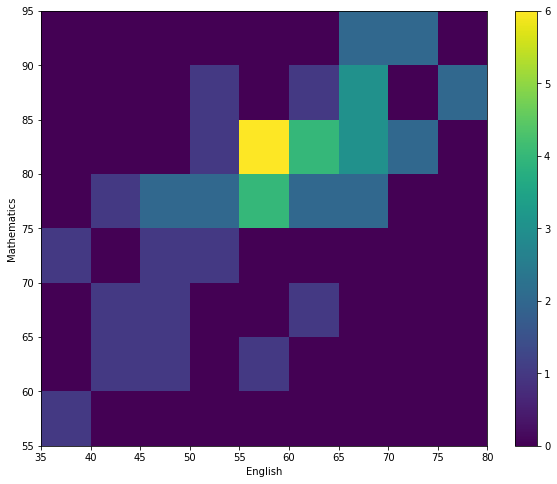

In [23]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(eng, math, bins=[9, 8], range=[(35, 80), (55, 95)]) # bins=[nx, ny], range=[(x_start, x_end), (y_start, y_end)]
ax.set_xlabel('English')
ax.set_ylabel('Mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

# 3. 앤스컴의 예  
평균, 분산, 상관계수, 회귀직선 등의 특징이 같으나 다른 분포를 가지고 있는 데이터들로  
시각화의 중요성을 알려준다.

In [29]:
# npy 형식으로 저장된 numpy array
anscombe_data = np.load('./data/ch3_anscombe.npy')
anscombe_data.shape

(4, 11, 2)

In [34]:
index = ['X_mean', 'X_variance', 'Y_mean', 'Y_variance', 'X&Y correlation', 'X&Y regression line']
stats_df = pd.DataFrame(index = index)
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}', f'{np.var(dataX):.2f}',
                             f'{np.mean(dataY):.2f}', f'{np.var(dataY):.2f}',
                             f'{np.corrcoef(dataX, dataY)[0,1]:.2f}', f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y correlation,0.82,0.82,0.82,0.82
X&Y regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


X와 Y의 평균, 분산, 상관계수, 회귀직선이 모두 같다.

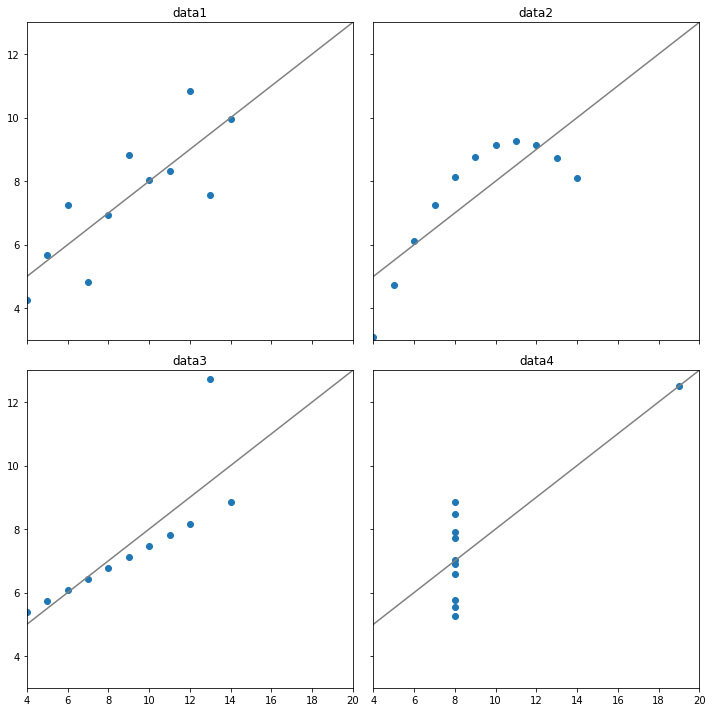

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이 간격 좁히기
plt.tight_layout()
plt.show()